In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import xarray as xr
import numpy as np
from scipy import stats
import cmocean

In [6]:
 # Importing the datasets
a = xr.open_dataset("etopo2.nc")
a

<xarray.Dataset>
Dimensions:  (lon: 10800, lat: 5400)
Coordinates:
  * lon      (lon) float32 -180.0 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * lat      (lat) float32 -90.0 -89.97 -89.93 -89.9 ... 89.87 89.9 89.93 89.97
Data variables:
    topo     (lat, lon) float32 ...

In [7]:
 # World Map visualisation
data_world = a.copy()
lat_world = data_world["lat"]
lon_world = data_world["lon"]

In [8]:
# Finding the statistics
stats.describe(np.array(data_world['topo']).flatten())

DescribeResult(nobs=58320000, minmax=(-10654.0, 8593.0), mean=-1890.0117, variance=7014527.620276537, skewness=0.26483466841614184, kurtosis=-1.1465929051117012)

# 1 Plotting the World Elevation Level

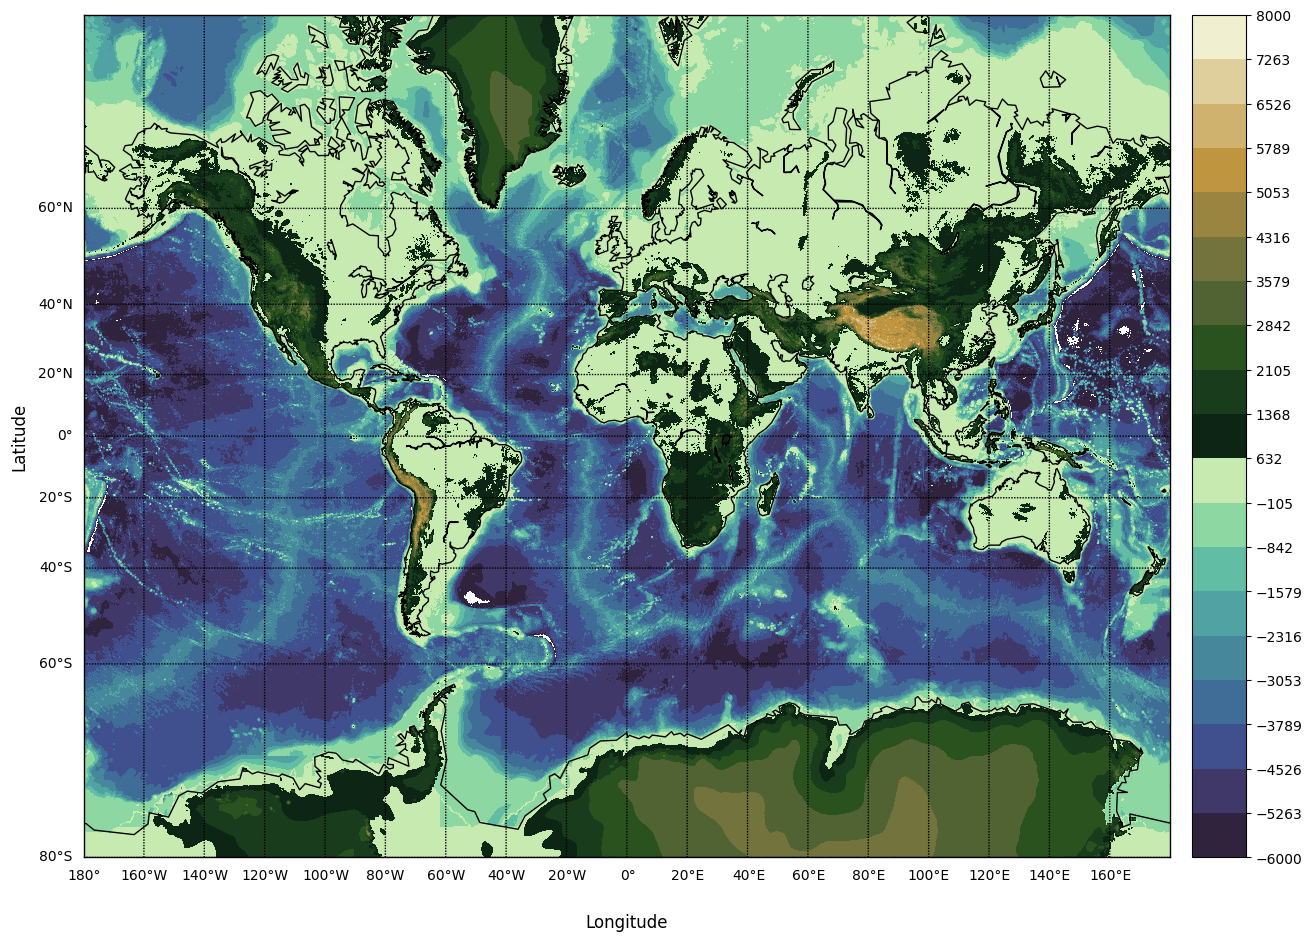

In [12]:
plt.figure(figsize=(15,16))
m=Basemap(projection='merc',lat_ts=10, llcrnrlon=lon_world.
min(),urcrnrlon=lon_world.max(),llcrnrlat=-80,urcrnrlat=80)
Lon,Lat = np.meshgrid(lon_world,lat_world)
x,y = m(Lon,Lat)
cs = m.contourf(x,y,data_world["topo"].values,cmap = cmocean.cm.topo,levels =
np.linspace(-6000,8000,20))
m.drawcoastlines()
m.drawmapboundary()
m.colorbar(cs,ticks = np.linspace(-6000,8000,20))
m.drawparallels(np.arange(-80,80,20),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180,180,20),labels=[0,0,0,1])
plt.xlabel('Longitude', labelpad=40, fontsize=12)
plt.ylabel('Latitude', labelpad=40, fontsize=12)
plt.savefig("World_plot.png")

# 2 Subsetting to the Indian Region

In [13]:
data = a.sel(lat = slice(0,26), lon = slice(60,100))
lat = data["lat"]
lon = data["lon"]
stats.describe(np.array(data['topo']).flatten()) # Statistics near the Indian␣region

DescribeResult(nobs=937981, minmax=(-5632.0, 3726.0), mean=-1917.2451, variance=3713854.209413047, skewness=0.1155665750321693, kurtosis=-1.5704259854272309)

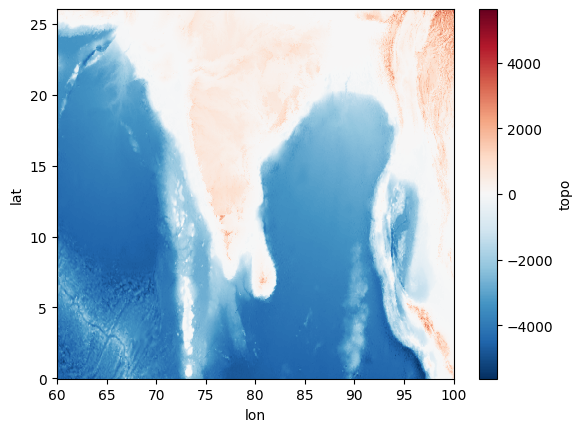

In [14]:
data["topo"].plot()
plt.show()

# 3 Masking out the land areas

we assign the areas with elevation greater than zero with nan values.

In [ ]:
 data["topo"].values[data["topo"].values > 0] = np.NaN # removing the land areas

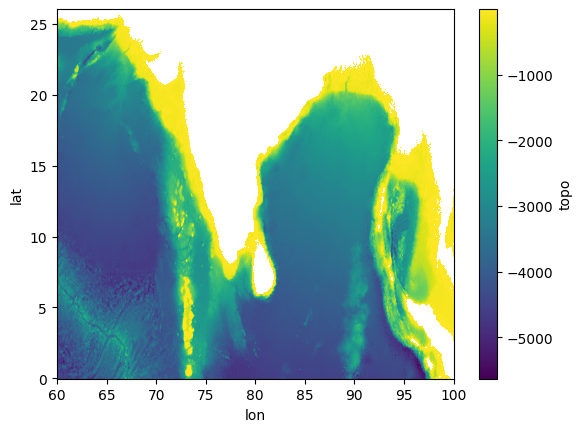

In [16]:
data["topo"].plot() # Verifying the masking of land
plt.show()

# 4 Generating plot for the Indian region

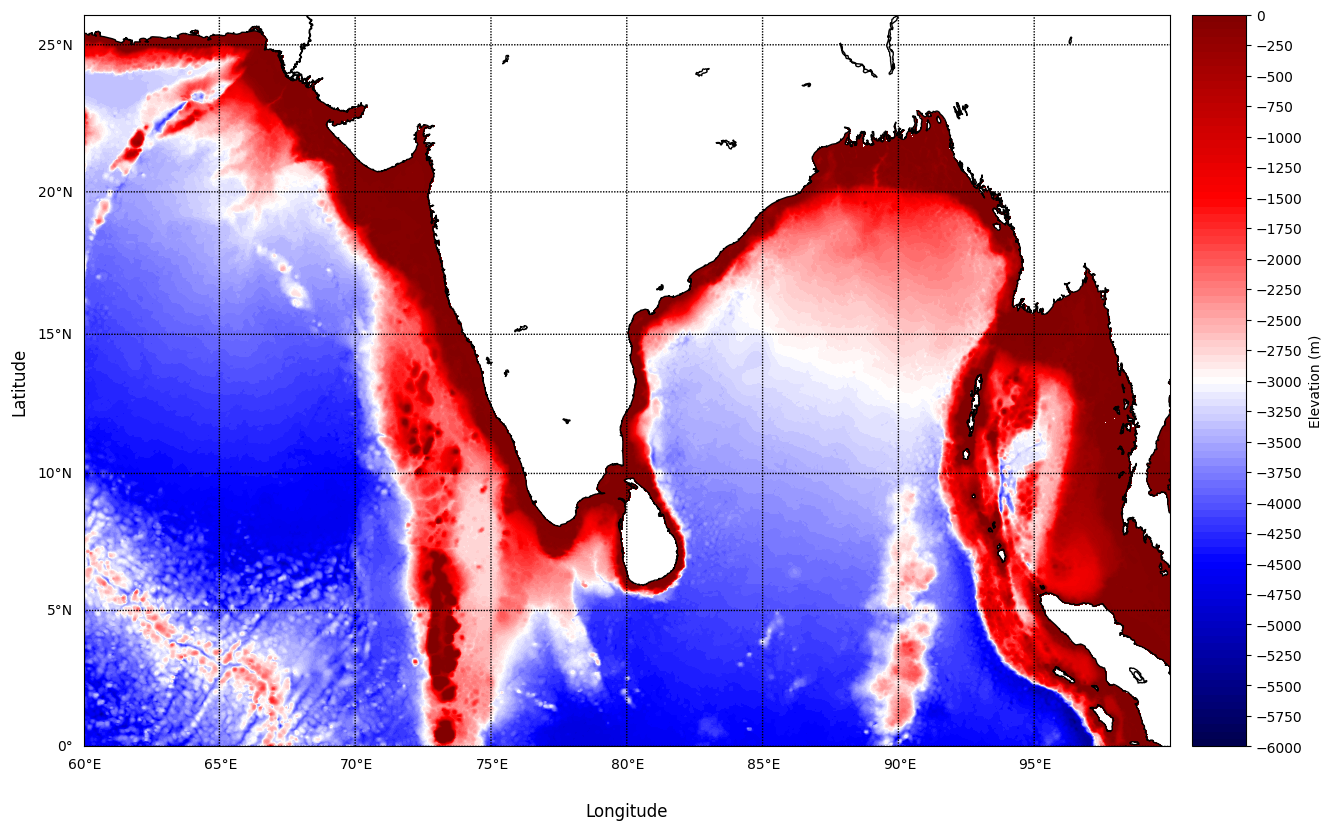

In [21]:
plt.figure(figsize=(15,16))
m=Basemap(projection='merc',lat_ts=10, llcrnrlon=lon.min(),urcrnrlon=lon.
max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(),resolution='i')
Lon,Lat = np.meshgrid(lon,lat)
x,y = m(Lon,Lat)
cs = m.contourf(x,y,data["topo"].values,cmap = 'seismic',levels = np.
linspace(-6000,0,100))
m.drawcoastlines()
m.colorbar(cs,ticks = np.linspace(-6000,0,25),label= "Elevation (m)")
m.drawparallels(np.arange(0,30,5.),labels=[1,0,0,0])
m.drawmeridians(np.arange(60,100,5.),labels=[0,0,0,1])
plt.xlabel('Longitude', labelpad=40, fontsize=12)
plt.ylabel('Latitude', labelpad=40, fontsize=12)
plt.savefig("India_plot_ocean.png")

# 5 Subseting to the Western and Eastern Coast of India

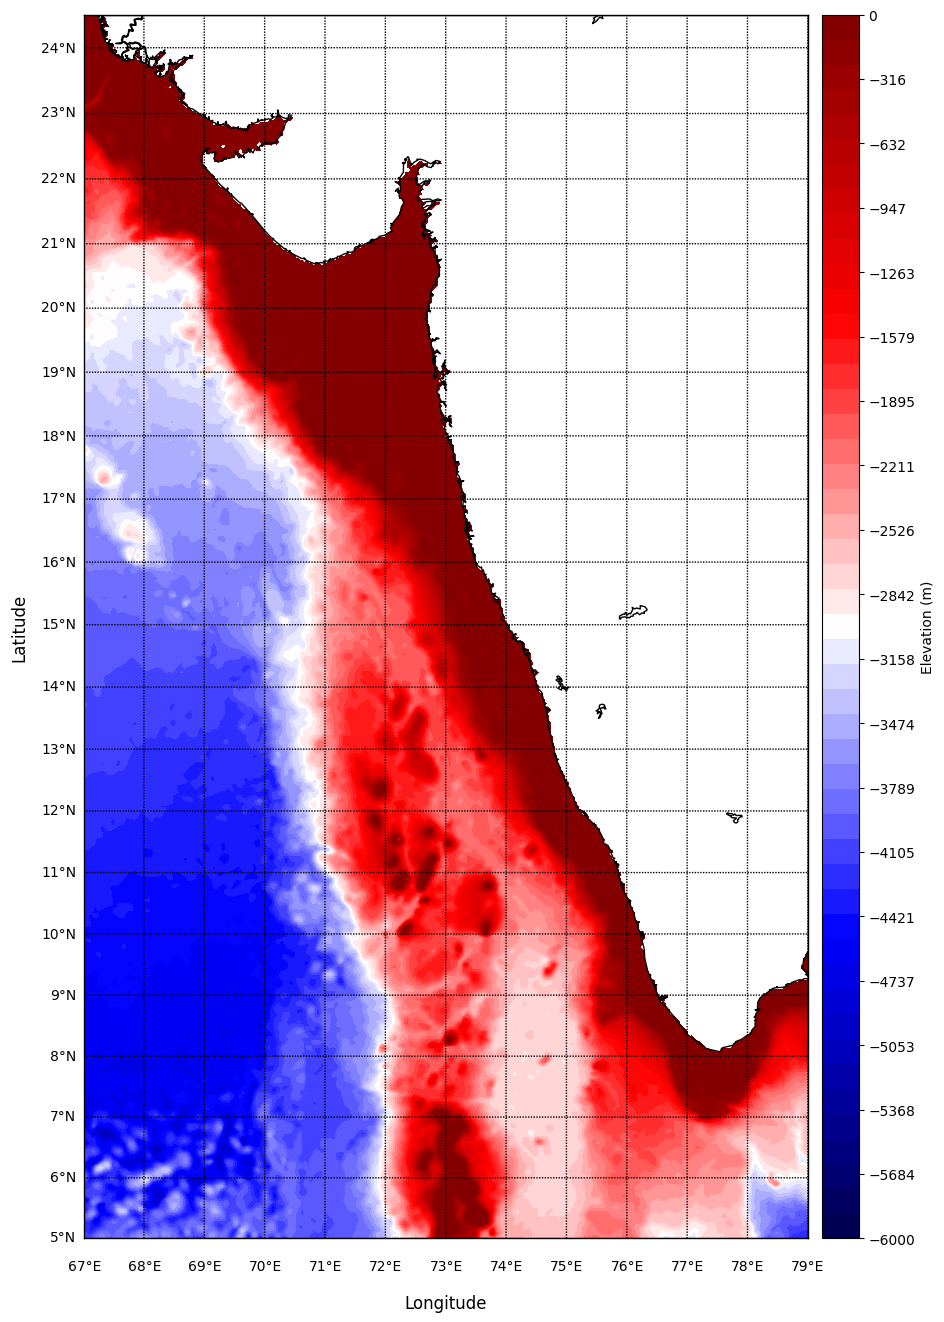

In [22]:
# Westcoast
data = a.sel(lat = slice(5,24.5), lon = slice(67,79))
data["topo"].values[data["topo"].values > 0] = np.NaN # removing the land areas
lat = data["lat"]
lon = data["lon"]
plt.figure(figsize=(10,16))
m=Basemap(projection='merc',lat_ts=1, llcrnrlon=lon.min(),urcrnrlon=lon.
max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(),resolution='i')
Lon,Lat = np.meshgrid(lon,lat)
x,y = m(Lon,Lat)
cs = m.contourf(x,y,data["topo"].values,cmap ='seismic',levels = np.
linspace(-6000,0,50))
m.drawcoastlines()
m.drawmapboundary()
m.colorbar(cs,ticks = np.linspace(-6000,0,20),label= "Elevation (m)")
m.drawparallels(np.arange(5,30,1.),labels=[1,0,0,0])
m.drawmeridians(np.arange(67,80,1.),labels=[0,0,0,1])
plt.xlabel('Longitude', labelpad=40, fontsize=12)
plt.ylabel('Latitude', labelpad=40, fontsize=12)
plt.savefig("India_west_plot.png")

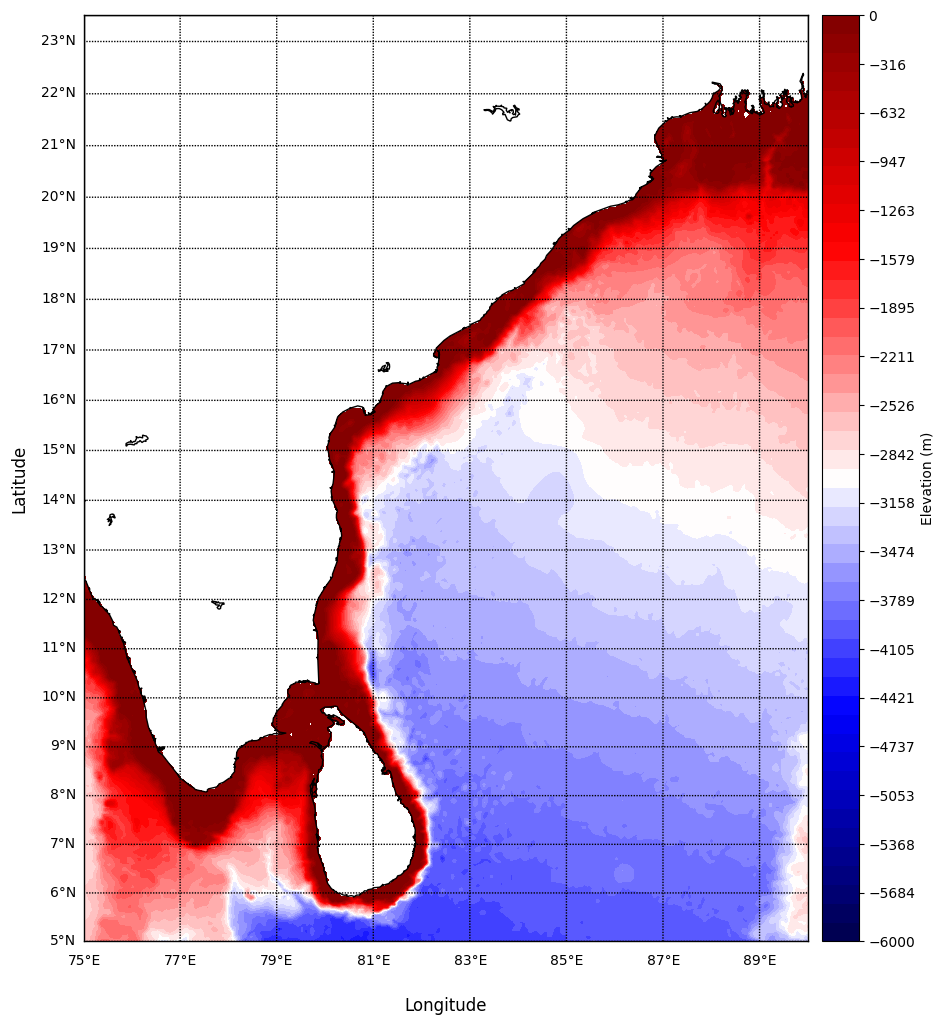

In [23]:
# Eastcoast
data = a.sel(lat = slice(5,23.5), lon = slice(75,90))
data["topo"].values[data["topo"].values > 0] = np.NaN # removing the land areas
lat = data["lat"]
lon = data["lon"]
plt.figure(figsize=(10,16))
m=Basemap(projection='merc',lat_ts=1, llcrnrlon=lon.min(),urcrnrlon=lon.
max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(),resolution='i')
Lon,Lat = np.meshgrid(lon,lat)
x,y = m(Lon,Lat)
# print(x)
# m.imshow(data["topo"].values, cmap = plt.get_cmap('terrain'), alpha = 0.5)
cs = m.contourf(x,y,data["topo"].values,cmap = 'seismic',levels = np.
linspace(-6000,0,50))
m.drawcoastlines()
# plt.clabel(cs, fmt="%1.0f", fontsize=8)
m.drawmapboundary()
m.colorbar(cs,ticks = np.linspace(-6000,0,20),label= "Elevation (m)")
m.drawparallels(np.arange(5,30,1.),labels=[1,0,0,0])
m.drawmeridians(np.arange(67,95,2),labels=[0,0,0,1])
plt.xlabel('Longitude', labelpad=40, fontsize=12)
plt.ylabel('Latitude', labelpad=40, fontsize=12)
plt.savefig("India_east_plot.png")

# 6 Contour Plot

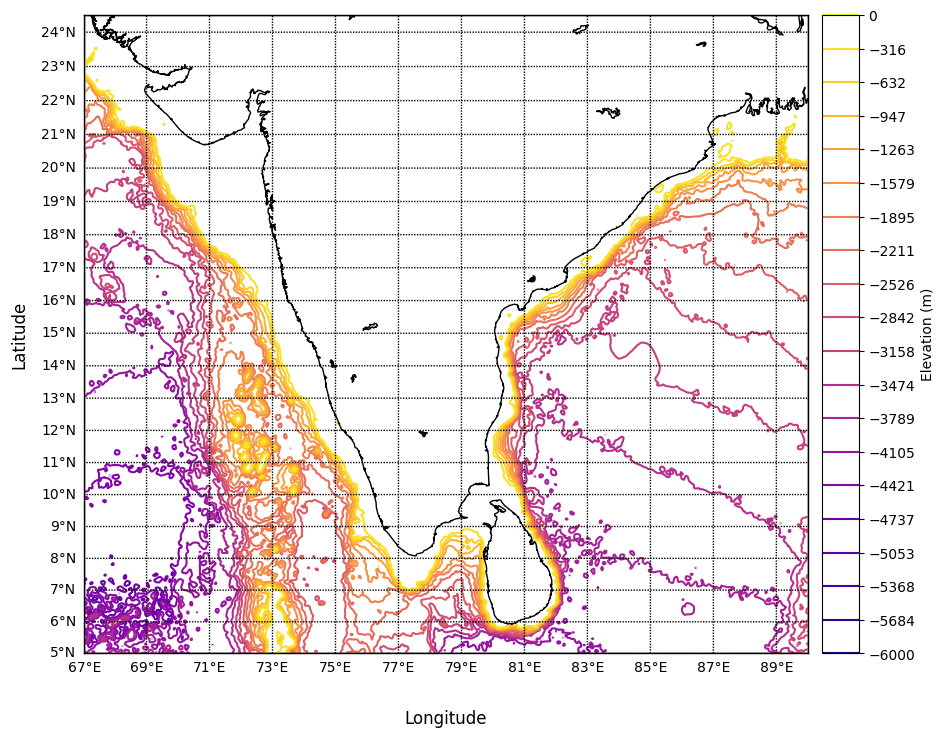

In [26]:
 #Contour
data = a.sel(lat = slice(5,24.5), lon = slice(67,90))
data["topo"].values[data["topo"].values > 0] = np.NaN # removing the land areas
lat = data["lat"]
lon = data["lon"]
plt.figure(figsize=(10,16))
m=Basemap(projection='merc',lat_ts=1, llcrnrlon=lon.min(),urcrnrlon=lon.
max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(),resolution='i')
Lon,Lat = np.meshgrid(lon,lat)
x,y = m(Lon,Lat)
cs = m.contour(x,y,data["topo"].values,cmap ='plasma',levels = np.
linspace(-6000,0,20))
m.drawcoastlines()
m.drawmapboundary()
m.colorbar(cs,ticks = np.linspace(-6000,0,20),label= "Elevation (m)")
m.drawparallels(np.arange(5,30,1.),labels=[1,0,0,0])
m.drawmeridians(np.arange(67,90,2.),labels=[0,0,0,1])
plt.xlabel('Longitude', labelpad=40, fontsize=12)
plt.ylabel('Latitude', labelpad=40, fontsize=12)
plt.savefig("India_contour_plot.png")